In [161]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np

## SVM MODEL

In [2]:
df_heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df_heart.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Exploration

In [4]:
print(df_heart.isna().sum())
print(df_heart.info())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float

In [5]:
#There's no missing value in this dataset

In [6]:
print(df_heart.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [7]:
bool_features = df_heart[['anaemia', 'smoking', 'sex', 'diabetes', 'high_blood_pressure', 'DEATH_EVENT']]
con_features = df_heart[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets'
                       ,'serum_creatinine', 'serum_sodium', 'time']]

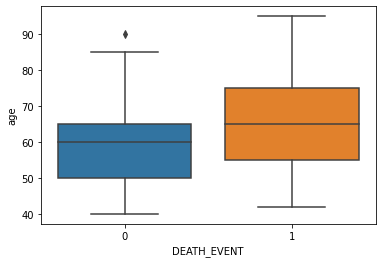

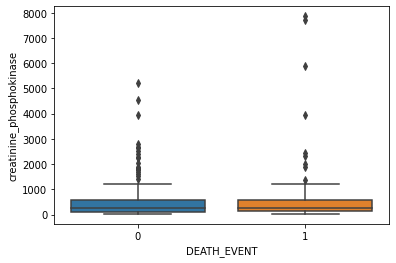

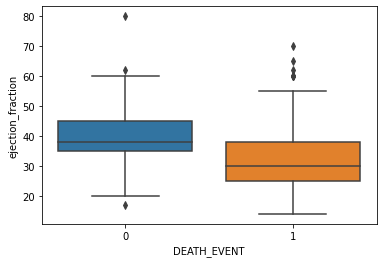

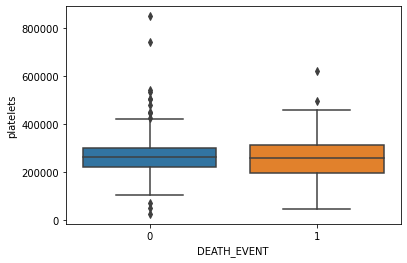

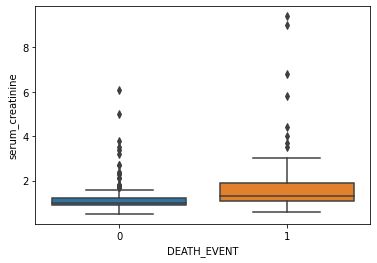

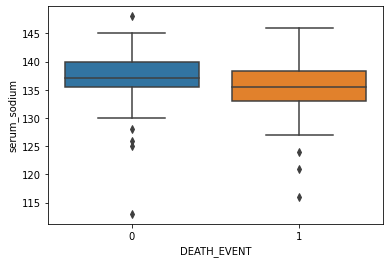

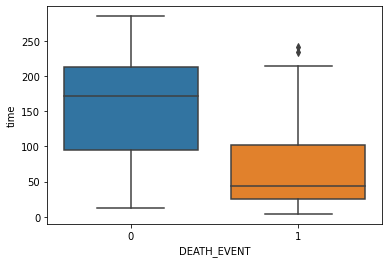

In [8]:
for i in con_features:
    sns.boxplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
    plt.ylabel(str(i))
    plt.show()

In [9]:
res = bool_features.groupby(['DEATH_EVENT']).sum()
res = res.reset_index()
res

,DEATH_EVENT,anaemia,smoking,sex,diabetes,high_blood_pressure
0,0,83,66,132,85,66
1,1,46,30,62,40,39


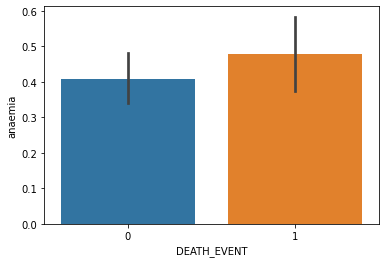

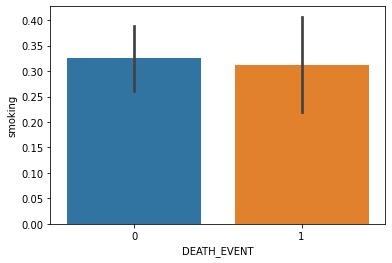

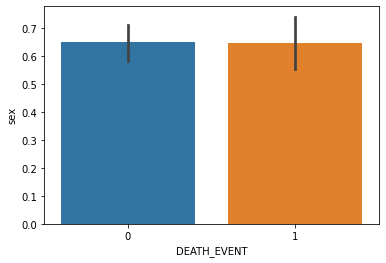

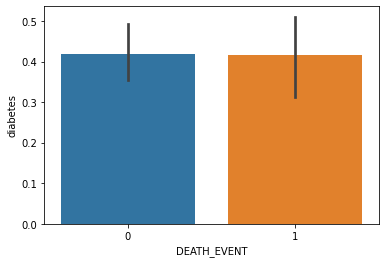

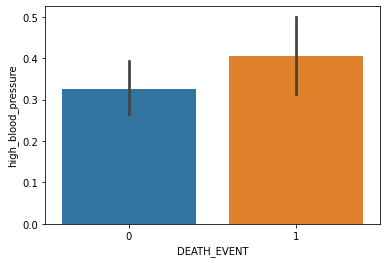

In [10]:
for i in bool_features:
    if (i != 'DEATH_EVENT'):
        sns.barplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
        plt.ylabel(str(i))
        plt.show()

### Extracting Features 

In [11]:
x = df_heart.loc[:, 'age':'time'].values
y = df_heart.loc[:, ['DEATH_EVENT']].values

In [12]:
#split train test set to 20:80
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, 
                                                                   test_size = 0.2, random_state=0)

In [13]:
def svm_model(k, c, x, y):
    model = svm.SVC(kernel=k, C=c).fit(x, y)
    return model
    

In [14]:
model_1_linear = svm_model('linear', 1, x_train, y_train.ravel())
model_2_poly = svm_model('poly', 1, x_train, y_train.ravel())
model_3_rbf = svm_model('rbf', 1, x_train, y_train.ravel())
model_4_sigmoid = svm_model('sigmoid', 1, x_train, y_train.ravel())

In [15]:
print(str('Linear Model Score : ') + str(model_1_linear.score(x_test, y_test)))
print(str('Poly Model Score : ') + str(model_2_poly.score(x_test, y_test)))
print(str('RBF Model Score : ') + str(model_3_rbf.score(x_test, y_test)))
print(str('Sigmoid Model Score : ') + str(model_4_sigmoid.score(x_test, y_test)))

Linear Model Score : 0.7666666666666667
Poly Model Score : 0.6166666666666667
RBF Model Score : 0.6166666666666667
Sigmoid Model Score : 0.6166666666666667


### Hyper Parameter Tuning

In [19]:
#testing different parameters to see which can create the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [17]:
param_grid = {'C':[0.1,1,50], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(x_train, y_train.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 50],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
print(grid.best_params_)
print(grid.score(x_test, y_test))

{'C': 1, 'kernel': 'linear'}
0.7666666666666667


### K-Folds Cross Validation

In [20]:
#give cross_val_score a model, the entire dataset and its real values and the number of folds:
scores_res = model_selection.cross_val_score(model_1_linear, x, y.ravel(), cv=4)
print(scores_res)
print(scores_res.mean())

[0.46666667 0.85333333 0.73333333 0.67567568]
0.6822522522522523


### Prediction

In [109]:
model_linear_pred = model_1_linear.predict(x_test)
df_result = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': model_linear_pred})
df_result[1:20]

,Actual,Predicted
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0
10,0,0


In [39]:

#creating confusion matrix
cm = confusion_matrix(y_test, model_linear_pred)
cm

array([[36,  1],
       [13, 10]])

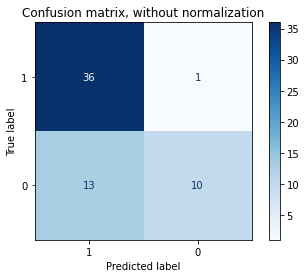

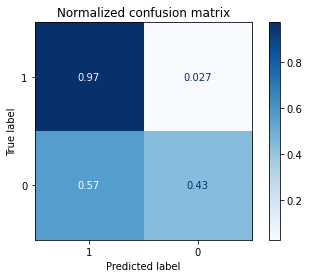

In [43]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = [1,0]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_1_linear, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

## k-Means Cluster

In [331]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [307]:
df_cervical = pd.read_csv('sobar-72.csv')
df_cervical.head(50)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
5,10,14,8,6,15,8,10,1,3,4,2,14,8,7,2,7,13,9,6,1
6,10,15,4,6,14,6,10,5,3,7,2,7,13,3,3,15,3,3,5,1
7,8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12,1
8,10,15,7,2,15,6,10,1,3,5,2,9,15,13,10,15,13,15,15,1
9,7,15,7,6,11,8,8,5,3,3,4,15,3,8,2,9,3,4,4,1


In [308]:
print(df_cervical.isna().sum())
print(df_cervical.describe())

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64
       behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
count            72.000000        72.000000                72.000000   
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                

In [309]:
#No cleaning nessessary there's no missing data

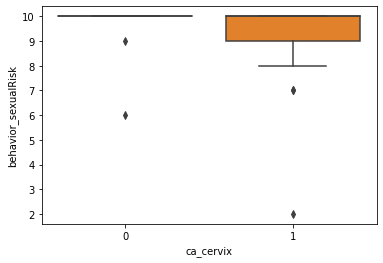

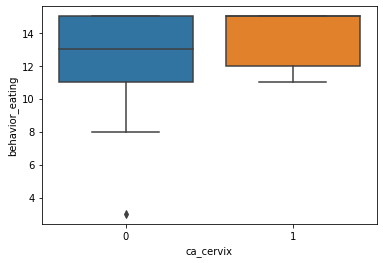

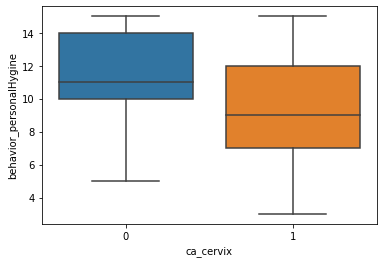

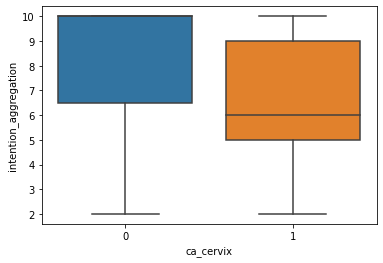

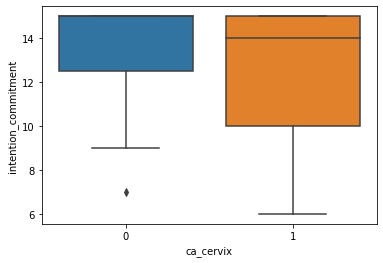

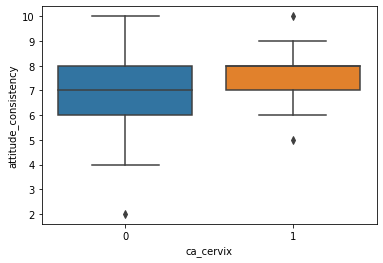

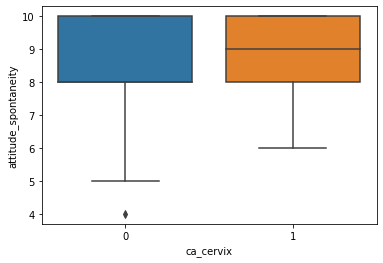

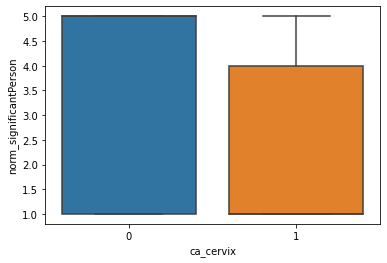

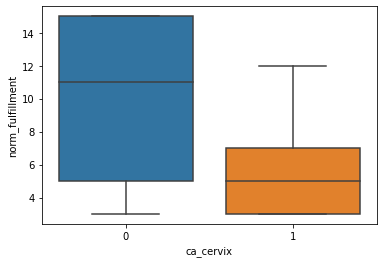

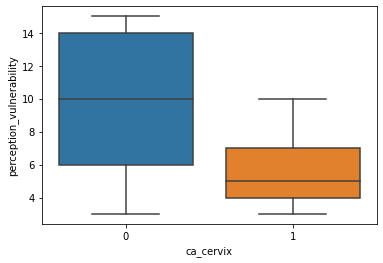

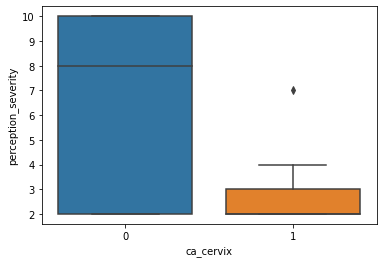

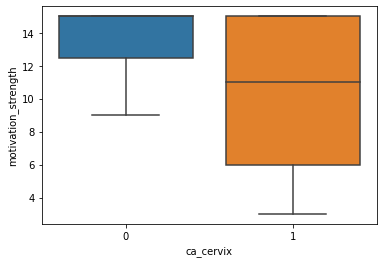

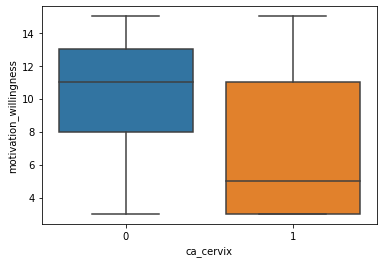

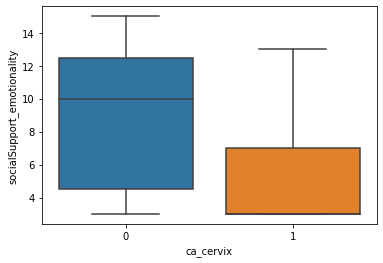

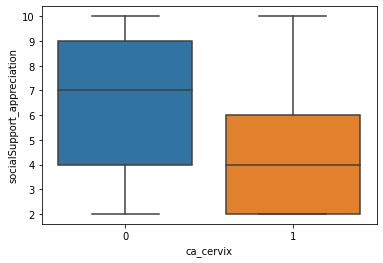

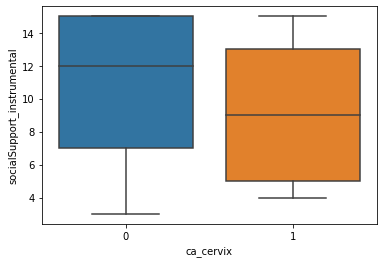

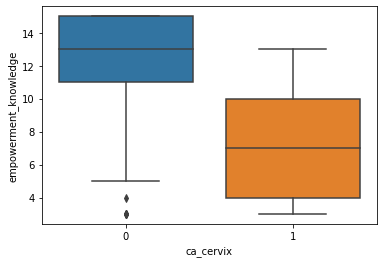

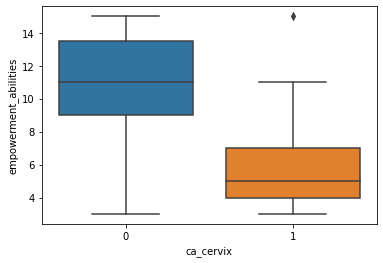

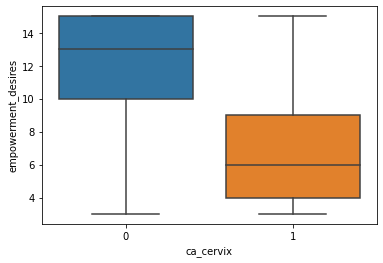

In [310]:
for i in df_cervical.columns:
    if (i != 'ca_cervix'):
        sns.boxplot(x=df_cervical.loc[:,'ca_cervix'], y=df_cervical.loc[:, str(i)])
        plt.ylabel(str(i))
        plt.show()

In [311]:
scl = MinMaxScaler()
df_cervical_scale = df_cervical.copy()
df_cervical_scale.loc[:,'behavior_sexualRisk':'empowerment_desires'] = scl.fit_transform(df_cervical_scale.loc[:,'behavior_sexualRisk':'empowerment_desires'])


In [312]:
df_cervical.head(30)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
5,10,14,8,6,15,8,10,1,3,4,2,14,8,7,2,7,13,9,6,1
6,10,15,4,6,14,6,10,5,3,7,2,7,13,3,3,15,3,3,5,1
7,8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12,1
8,10,15,7,2,15,6,10,1,3,5,2,9,15,13,10,15,13,15,15,1
9,7,15,7,6,11,8,8,5,3,3,4,15,3,8,2,9,3,4,4,1


In [313]:
from sklearn.cluster import KMeans

### K-Means for Non-Scale data and Scale Date

In [327]:
km = KMeans(n_clusters = 4, random_state=42)
df_cervical['cluster'] = km.fit_predict(df_cervical)

In [328]:
df_cervical.head(15)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,...,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix,cluster
0,10,13,12,4,7,9,10,1,8,7,...,14,8,5,7,12,12,11,8,1,1
1,10,11,11,10,14,7,7,5,5,4,...,15,13,7,6,5,5,4,4,1,1
2,10,15,3,2,14,8,10,1,4,7,...,7,3,3,6,11,3,3,15,1,1
3,10,11,10,10,15,7,7,1,5,4,...,15,13,7,4,4,4,4,4,1,1
4,8,11,7,8,10,7,8,1,5,3,...,15,5,3,6,12,5,4,7,1,1
5,10,14,8,6,15,8,10,1,3,4,...,14,8,7,2,7,13,9,6,1,1
6,10,15,4,6,14,6,10,5,3,7,...,7,13,3,3,15,3,3,5,1,1
7,8,12,9,10,10,5,10,5,5,5,...,10,9,13,2,9,8,7,12,1,1
8,10,15,7,2,15,6,10,1,3,5,...,9,15,13,10,15,13,15,15,1,0
9,7,15,7,6,11,8,8,5,3,3,...,15,3,8,2,9,3,4,4,1,1


In [329]:
df_cervical['cluster'].value_counts()

2    21
0    20
1    18
3    13
Name: cluster, dtype: int64

In [330]:
km_scale = KMeans(n_clusters = 4, random_state=42)
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df_cervical_scale)
label = km_scale.fit_predict(df_cervical_scale)
df_cervical_scale['cluster'] = label
df_cervical_scale.head(15)

ValueError: could not convert string to float: 'Data'

In [318]:
df_cervical_scale['cluster'].value_counts()

2    22
3    21
1    20
0     9
Name: cluster, dtype: int64

### Parameter tuning Elbow Method

In [319]:
dist_df = []
dist_df_scale = []
for n_clusters in range(1,15):
    
    km = KMeans(n_clusters = n_clusters)
    km_scale = KMeans(n_clusters = n_clusters)
    
    km.fit(df_cervical)
    km_scale.fit(df_cervical_scale)
    
    dist_df.append([n_clusters, km.inertia_])
    dist_df_scale.append([n_clusters, km_scale.inertia_])
    
dist_df = pd.DataFrame(dist_df, columns=['n_clusters', 'distance from centroid'])
dist_df_scale = pd.DataFrame(dist_df_scale, columns=['n_clusters', 'distance from centroid'])


In [320]:
dist_df.head()

,n_clusters,distance from centroid
0,1,15750.319444
1,2,10758.792302
2,3,8392.435185
3,4,7132.322344
4,5,6672.735043


In [321]:
dist_df_scale.head()

,n_clusters,distance from centroid
0,1,234.699980
1,2,157.277389
2,3,115.079485
3,4,75.944490
4,5,70.747074


Text(0.5, 1.0, 'K-Means Elbow Non-Scale Data')

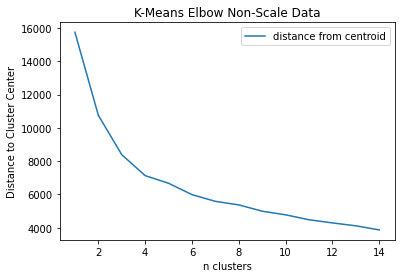

In [322]:
dist_df.set_index('n_clusters').plot()
plt.xlabel('n clusters')
plt.ylabel('Distance to Cluster Center')
plt.title('K-Means Elbow Non-Scale Data')

Text(0.5, 1.0, 'K-Means Elbow Scale Data')

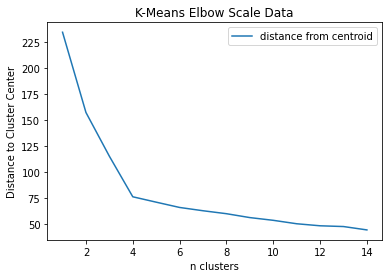

In [323]:
dist_df_scale.set_index('n_clusters').plot()
plt.xlabel('n clusters')
plt.ylabel('Distance to Cluster Center')
plt.title('K-Means Elbow Scale Data')

In [324]:
#K-Means is sensitive to outliers so scaling is needed the scale data gives us a more precise n_clusters based on the elbow method

2021-03-26 15:48:39,281 [1372] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-26 15:48:39,521 [1372] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-26 15:48:39,901 [1372] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-26 15:48:39,927 [1372] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seab

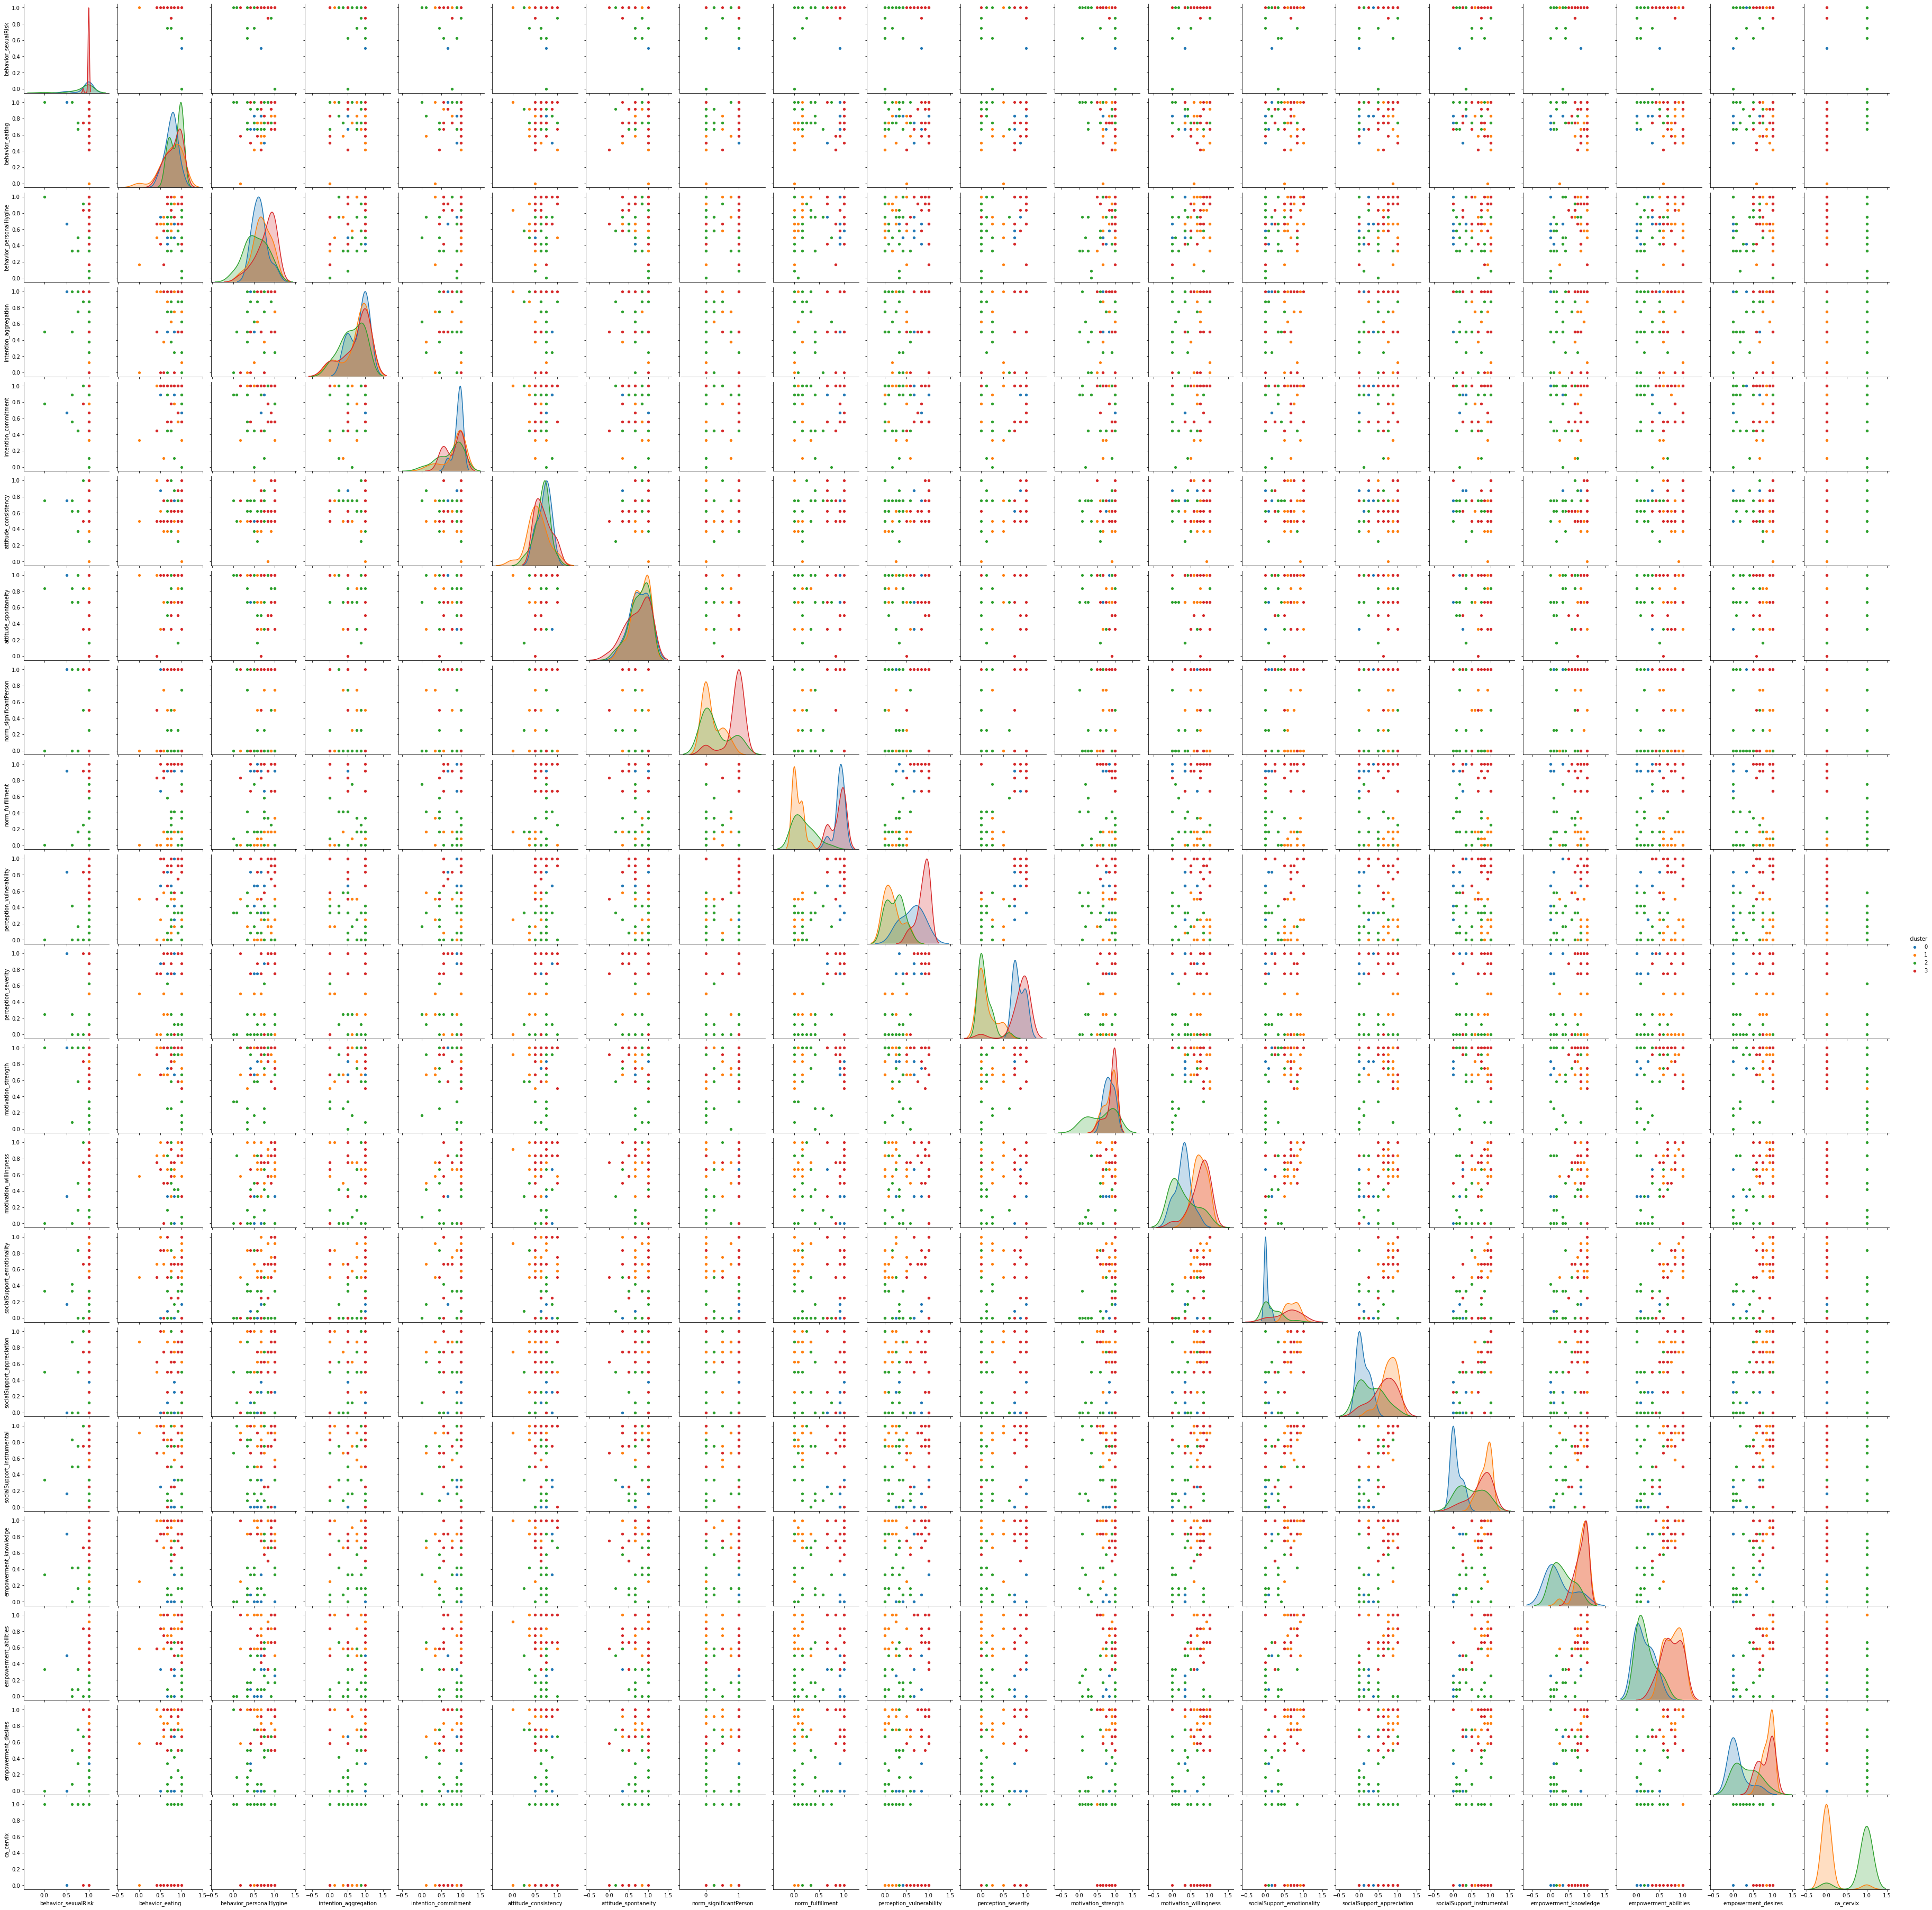

In [296]:
sns.pairplot(df_cervical_scale,hue='cluster')

In [325]:
df_cervical_scale['Constant'] = "Data"

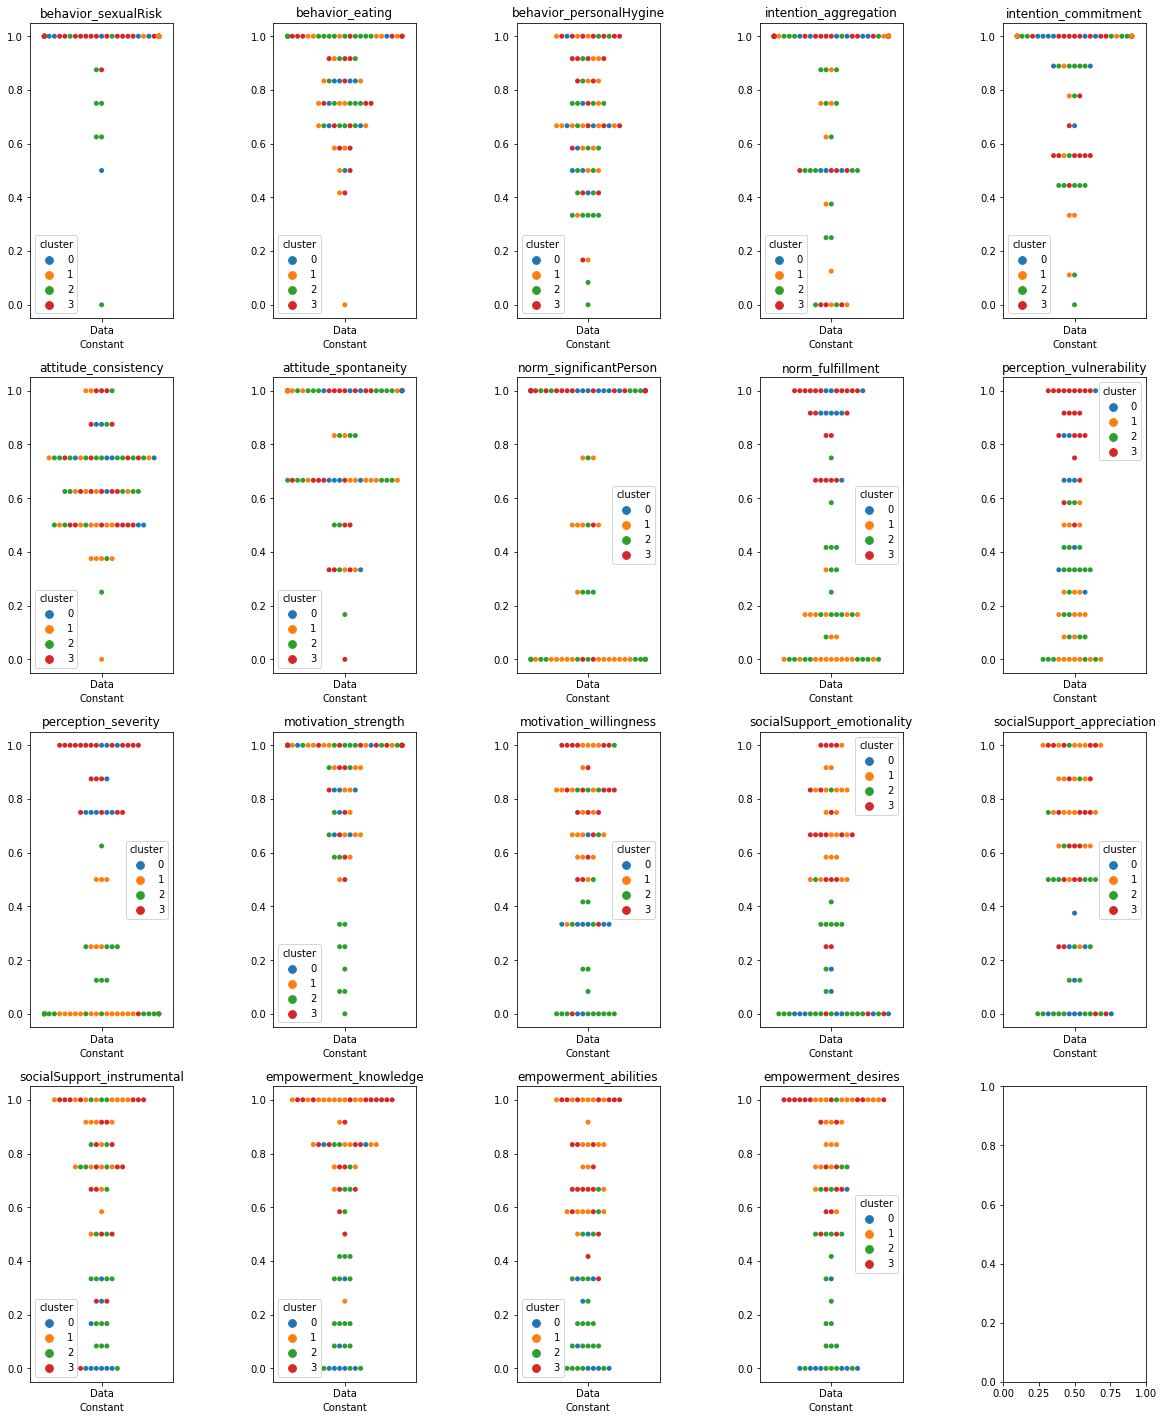

In [326]:
f, axes = plt.subplots(4, 5, figsize=(20, 25), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
f.subplots_adjust(hspace=0.2, wspace=0.7) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(df_cervical_scale))-3): 
    col = df_cervical_scale.columns[i]
    if i < 5:
        ax = sns.swarmplot(x=df_cervical_scale['Constant'],y=df_cervical_scale[col].values,hue=df_cervical_scale['cluster'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 5 and i<10:
        ax = sns.swarmplot(x=df_cervical_scale['Constant'],y=df_cervical_scale[col].values,hue=df_cervical_scale['cluster'],ax=axes[1,(i-5)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 10 and i<15:
        ax = sns.swarmplot(x=df_cervical_scale['Constant'],y=df_cervical_scale[col].values,hue=df_cervical_scale['cluster'],ax=axes[2,(i-10)])
        ax.set_title(col)
    elif i >= 15:
        ax = sns.swarmplot(x=df_cervical_scale['Constant'],y=df_cervical_scale[col].values,hue=df_cervical_scale['cluster'],ax=axes[3,(i-15)])
        ax.set_title(col)
